<h2 style='text-align: center;'>Titanic </h2>

*The RMS Titanic, a luxury steamship, sank in the early hours of April 15, 1912, off the coast of Newfoundland in the North Atlantic after sideswiping an iceberg during its maiden voyage. Of the 2,240 passengers and crew on board, more than 1,500 lost their lives in the disaster.Based on some factor involved in surviving, it seems some groups of people were more likely to survive than others*.

### 1. Problem Understanding and Definition

**Analyzed people who were most likely to survive**
1. Who Passengers survived in This Titanic Wreck?
2. Based on What, Passengers who can be survived?

### 2.	Data collection and preparation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df =sns.load_dataset('titanic')

In [3]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
df['deck'].value_counts()

C    59
B    47
D    33
E    32
A    15
F    13
G     4
Name: deck, dtype: int64

In [5]:
df.shape

(891, 15)

### 3. Data understanding using Exploratory Data Analysis (EDA) and Analyze Insight

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [7]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

- Since more than 75% feature deck has missing value from data. we can drop it. 

### 3.1 Handling the Missing Value

In [8]:
df= df.drop(columns='deck', axis=1)
df['age'].fillna(df['age'].mean(), inplace=True)
df['embark_town'].fillna(df['embark_town'].mode()[0], inplace= True)
df['embarked'].fillna(df['embarked'].mode()[0], inplace= True)

In [9]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


- 'fare' price differences between the 75th percentile, standard deviation, and the max value (512). it possibles as The Outlier
- 38% out of survived the Titanic.
- The passenger age range from 0.4 to 80 years old.

### 3.2 Dealing The Outlier

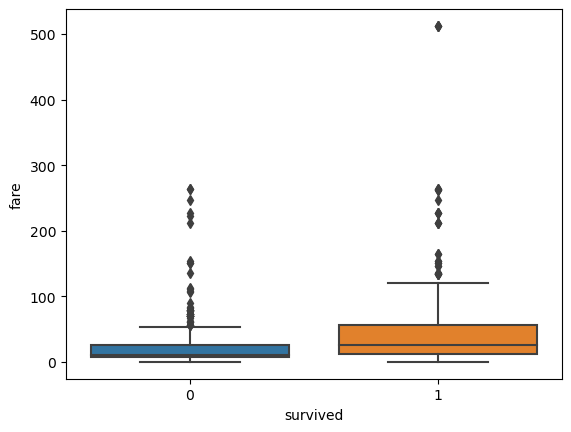

In [10]:
sns.boxplot(x='survived',y='fare',data=df, fliersize=5);

**Passengers who paid over more than 300**

In [11]:
df[df['fare']>300]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
258,1,1,female,35.0,0,0,512.3292,C,First,woman,False,Cherbourg,yes,True
679,1,1,male,36.0,0,1,512.3292,C,First,man,True,Cherbourg,yes,False
737,1,1,male,35.0,0,0,512.3292,C,First,man,True,Cherbourg,yes,True


***Insight***:
- Average age: 35 years old who survived, with port in Cherbourg
- Only one parch(parents or children) e feature contained each passenger was touring with. 
- There are many outliers because the difference price of each class.

#### Passengers who Survived and Not Survived

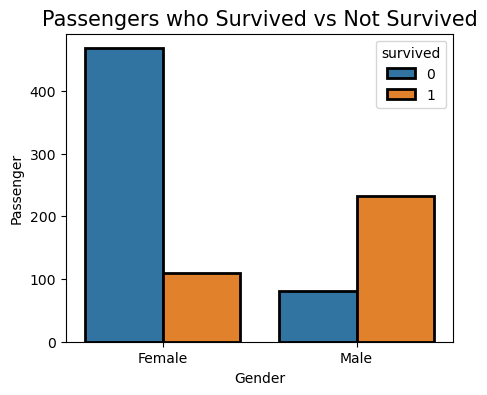

In [12]:
import warnings
warnings.filterwarnings('ignore')
plt.subplots(figsize = (5,4))
ax=sns.countplot(x='sex', data = df, hue='survived', edgecolor=(0,0,0), linewidth=2)
plt.title('Passengers who Survived vs Not Survived', fontsize= 15)
plt.xlabel('Gender')
plt.ylabel('Passenger')
labels= ['Female', 'Male']
plt.xticks(sorted(df.survived.unique()),labels);
plt.show()

In [13]:
df.groupby(['sex']).mean().reset_index()

,sex,survived,pclass,age,sibsp,parch,fare,adult_male,alone
0,female,0.742038,2.159236,28.216730,0.694268,0.649682,44.479818,0.000000,0.401274
1,male,0.188908,2.389948,30.505824,0.429809,0.235702,25.523893,0.930676,0.712305


>- 74% of **Women survived** and 18.9% of **Men** survived

In [14]:
df.groupby(['sex', 'pclass']).mean()

survived        age     sibsp     parch        fare  \
sex    pclass                                                        
female 1       0.968085  34.141405  0.553191  0.457447  106.125798   
       2       0.921053  28.748661  0.486842  0.605263   21.970121   
       3       0.500000  24.068493  0.895833  0.798611   16.118810   
male   1       0.368852  39.287717  0.311475  0.278689   67.226127   
       2       0.157407  30.653908  0.342593  0.222222   19.741782   
       3       0.135447  27.372153  0.498559  0.224784   12.661633   

               adult_male     alone  
sex    pclass                        
female 1         0.000000  0.361702  
       2         0.000000  0.421053  
       3         0.000000  0.416667  
male   1         0.975410  0.614754  
       2         0.916667  0.666667  
       3         0.919308  0.760807

**insight**: 
>- Women at first and second class more likely to survive than Men at there
>- Men at first class 2.5 times more likely to survive than Women at first class

#### Passengers who Survived based on Age

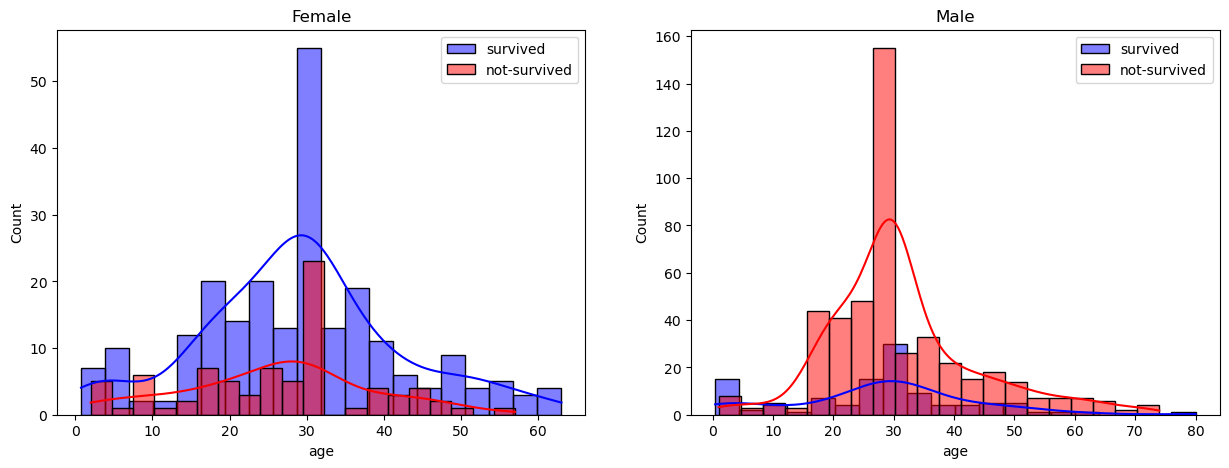

In [16]:
survived = 'survived'
not_survived = 'not-survived'

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

women = df[df['sex']=='female']
men = df[df['sex']=='male']

# Plot Female Survived vs Not-Survived distribution
ax = sns.histplot(women[women['survived']==1].age, bins=20, label = survived, ax = axes[0],color='b', kde=True)
ax = sns.histplot(women[women['survived']==0].age, bins=20, label = not_survived, ax = axes[0],color='r', kde=True)
ax.legend()
ax.set_title('Female')

# Plot Male Survived vs Not-Survived distribution
ax = sns.histplot(men[men['survived']==1].age, bins=20, label = survived, ax = axes[1],color='b', kde=True)
ax = sns.histplot(men[men['survived']==0].age, bins=20, label = not_survived, ax = axes[1],color='r', kde=True)
ax.legend()
ax.set_title('Male');

- **Men** have a higher probability of survival when they are between **18 and 35 years old**. While **women** are **higher** survival chance between **15 and 40 years old**.
- For men, **the low probability of survival is between 5 and 18 years old**, and after **35**, but that isn’t true for women. Another thing to note is that **infants** have **high probability of survival**.

In [17]:
df[df['age']<18].groupby(['sex', 'pclass']).mean()

survived        age     sibsp     parch        fare  \
sex    pclass                                                        
female 1       0.875000  14.125000  0.500000  0.875000  104.083337   
       2       1.000000   8.333333  0.583333  1.083333   26.241667   
       3       0.542857   8.428571  1.571429  1.057143   18.727977   
male   1       1.000000   8.230000  0.500000  2.000000  116.072900   
       2       0.818182   4.757273  0.727273  1.000000   25.659473   
       3       0.232558   9.963256  2.069767  1.000000   22.752523   

               adult_male     alone  
sex    pclass                        
female 1         0.000000  0.125000  
       2         0.000000  0.166667  
       3         0.000000  0.228571  
male   1         0.250000  0.000000  
       2         0.181818  0.181818  
       3         0.348837  0.232558

- Passengers saved the children first is **Approved**!

**Passengers who Survived derived from Class**

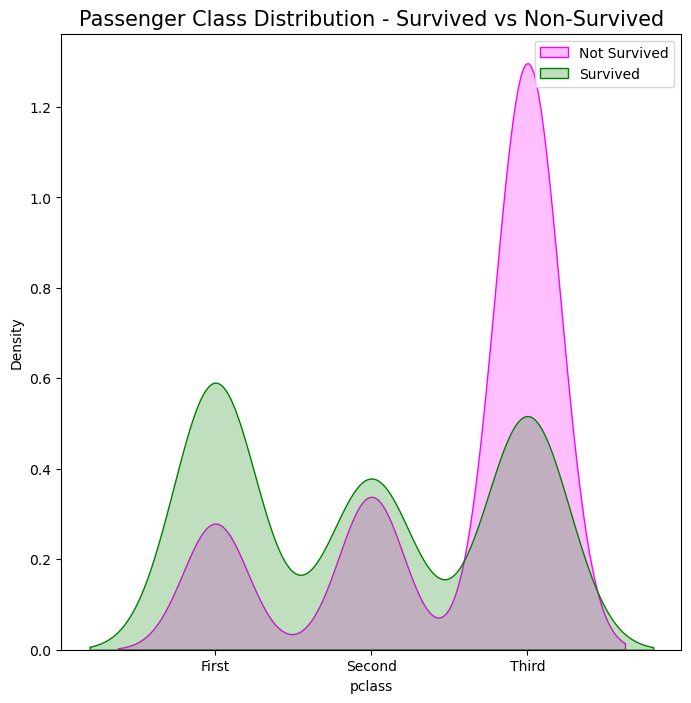

In [18]:
plt.subplots(figsize=(8,8))
ax=sns.kdeplot(df.loc[(df['survived'] == 0),'pclass'],shade=True,color='magenta',label='Not Survived')
ax.legend()
ax=sns.kdeplot(df.loc[(df['survived'] == 1),'pclass'],shade=True,color='green',label='Survived')
ax.legend()

plt.title("Passenger Class Distribution - Survived vs Non-Survived", fontsize = 15)
labels = ['First', 'Second', 'Third']
plt.xticks(sorted(df.pclass.unique()),labels);

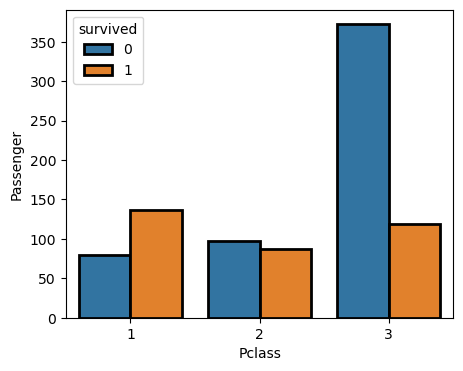

In [19]:
plt.subplots(figsize = (5,4))
ax1= sns.countplot('pclass', hue= 'survived',data= df,edgecolor=(0,0,0), linewidth=2)
plt.xlabel('Pclass')
plt.ylabel('Passenger')
plt.show()

In [20]:
df.groupby('pclass').mean()

,survived,age,sibsp,parch,fare,adult_male,alone
pclass,,,,,,,
1,0.629630,37.048118,0.416667,0.356481,84.154687,0.550926,0.504630
2,0.472826,29.866958,0.402174,0.380435,20.662183,0.538043,0.565217
3,0.242363,26.403259,0.615071,0.393075,13.675550,0.649695,0.659878


The graphs show economic status played an important role regarding the potential survival of the Titanic passengers. 
Conclusion:
>- 63% of the 1st class passengers survived the Titanic wreck
>- 48% of the 2nd class passengers survived
>- Only 24% of the 3rd class passengers survived

**Based on Embarked Differences**

In [21]:
df.groupby('embarked').mean()

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
embarked,,,,,,,,
C,0.553571,1.886905,30.562419,0.386905,0.363095,59.954144,0.535714,0.505952
Q,0.389610,2.909091,29.113724,0.428571,0.168831,13.276030,0.480519,0.740260
S,0.339009,2.346749,29.544382,0.569659,0.411765,27.243651,0.634675,0.611455


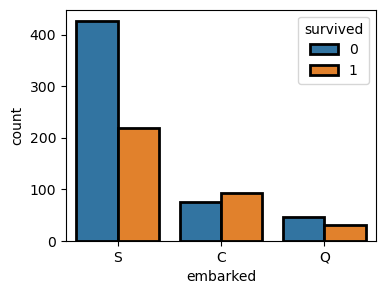

In [22]:
plt.subplots(figsize= (4,3))
ax= sns.countplot(x='embarked', hue='survived',data= df, edgecolor=(0,0,0), linewidth= 2)

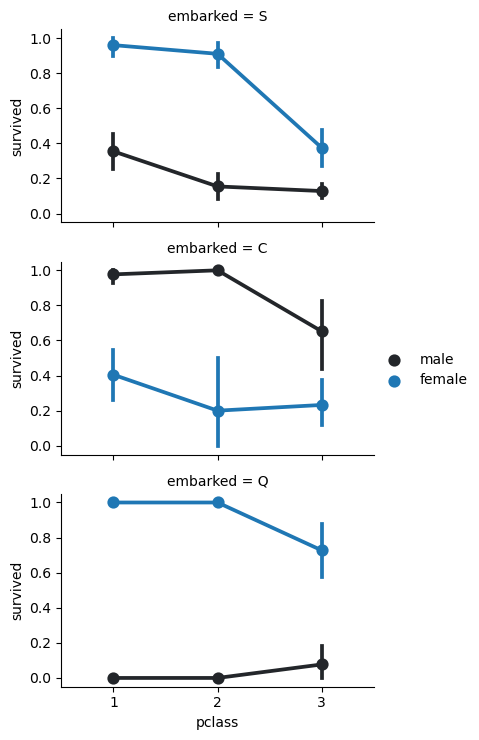

In [23]:
FacetGrid = sns.FacetGrid(df, row='embarked', size=2.5, aspect=1.6)
FacetGrid.map(sns.pointplot, 'pclass', 'survived', 'sex')
FacetGrid.add_legend();

>- **Women** on port  and on port S have a higher chance of survival. In the other hand, if they are at port C. 
>- **Men** have a high survival probability if they are on port C, but a low probability if they are on port Q or S.

In [24]:
print(pd.pivot_table(df, index = 'survived', columns = 'embarked', values = 'sibsp' ,aggfunc ='count'))

embarked   C   Q    S
survived             
0         75  47  427
1         93  30  219


### 3.3 Describing Relatives

***Do parch and sibsp relate to survival rates besides kinship?***

In [25]:
df1 = df[['age','sibsp','parch','fare']]
df2 = df[['survived','pclass','sex','embarked']]

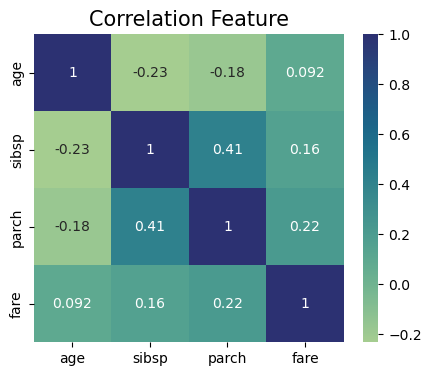

In [26]:
plt.subplots(figsize = (5,4))
#sns.heatmap(df2_num.corr(), annot=True,cmap="RdBu")
sns.heatmap(df1.corr() ,annot = True, cmap= "crest")
plt.title('Correlation Feature', fontsize= 15);

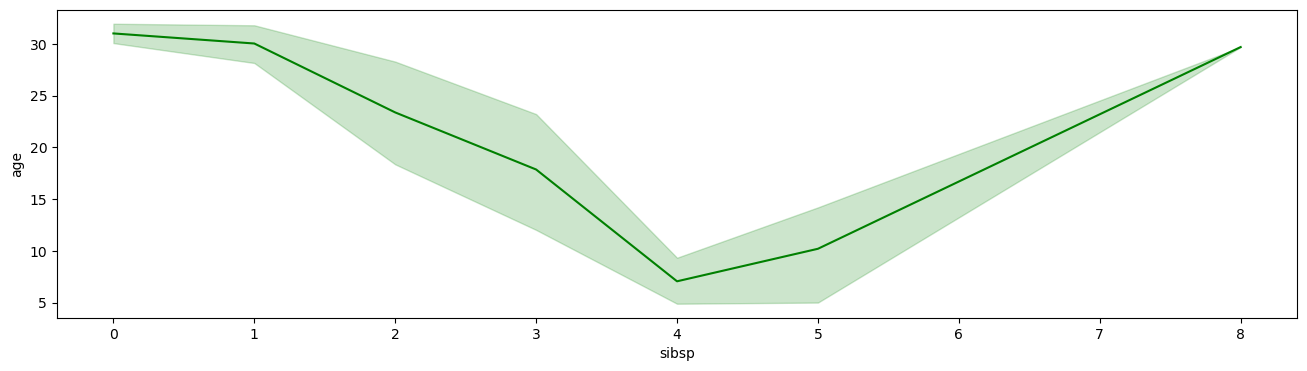

In [27]:
plt.subplots(figsize = (16,4))
ax = sns.lineplot(x='sibsp',y='age', data=df, color= 'green');

**Insight**:
- the correlation between feature sibsp and parch is high. it indicates parents and the childreen tendency traveled together.
- sibsp feature has negative correlation in age. because Passenggers Age who is 30 years old didn't have relatives. The inverse is **True**

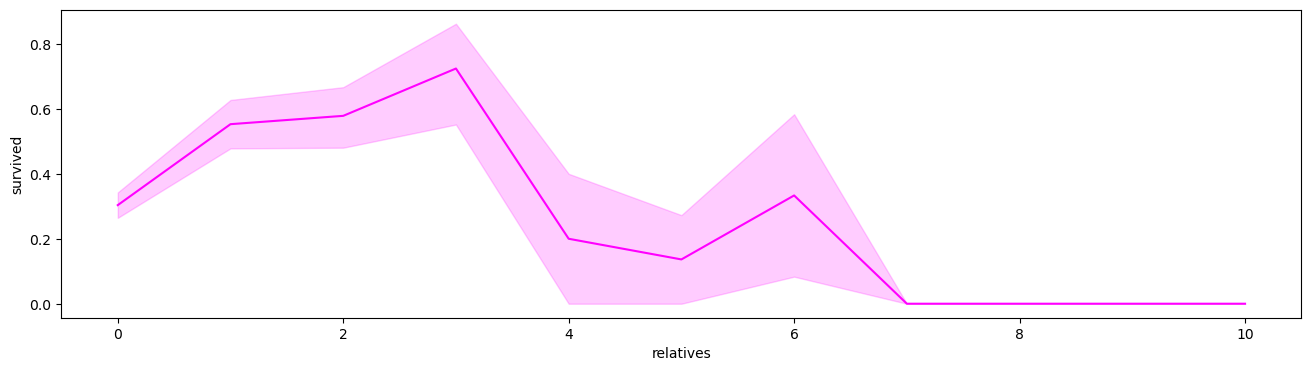

In [30]:
df['relatives'] = df['sibsp'] + df['parch']
plt.subplots(figsize = (16,4))
ax = sns.lineplot(x='relatives',y='survived', data=df, color= 'magenta');


$Insight$: *High probabilty of survival with 1 to 3 realitves, but a lower one if it had less than 1 or more than 3 (except for some cases with 6 relatives)*

## 4. Conclusion

>- 38% out of survived the Titanic.(The passenger age range from 0.4 to 80 years old).
>- Only one relatives parch was touring with who paid over 300.
>- 74% of Women survived and 18.9% of Men survived.
>- Women at first and second class more likely to survive. 
>- Men at first class 2.5 times more likely to survive than Women.
>- Men have a higher probability of survival when they are between 18 and 35 years old. 
>- women are higher survival chance between 15 and 40 years old.
>- Economic status played an important role regarding the potential survival of the Titanic passengers. 
>- Women on port and on port S have a higher chance of survival. Men are on port C.